In [11]:
%run imports.ipynb
%run information_conditions.ipynb import Information_Conditions
%run base_ecopg.ipynb import BaseEcologicalPublicGood
%run helper_functions.ipynb import *
%run simulation_and_results_functions.ipynb import *

In [2]:
all_information_modes = [
        'both_state_and_action_information', 
        'only_action_history_information', 
        'only_state_information', 
        'no_information'
    ]

In [15]:

def compare_conditions(num_samples=5, degraded_choice = False, m_value = -6, discount_factor = 0.98, exclude_degraded_state_for_average_cooperation = True , information_modes = all_information_modes, Tmax=1000, tolerance=1e-5):
    """
    Runs simulations for different information conditions and outputs 
    the results for each condition.
    
    Parameters:
        ecopg (EcologicalPublicGood): An instance of the ecological public good model.
        num_samples (int): Number of initial conditions to sample.
        Tmax (int): Maximum time steps for trajectory simulation.
        tolerance (float): Convergence tolerance for fixed point detection.
        
    Returns:
        None (prints the output summaries for each information condition)
    """

    print(locals())
    
    basin_of_attraction_cooperation_results = {}
    
    
    ecopg = BaseEcologicalPublicGood(m = m_value, degraded_choice=degraded_choice)

    for mode in information_modes:
        # Initialize the information condition
        information_condition_instance = Information_Conditions(ecopg, mode=mode)
        mae = POstratAC_eps(env=information_condition_instance, learning_rates=0.1, discount_factors= discount_factor)

        # Data storage

        # print(f"\nMode: {mode}")

        avg_coop_time_pairs = run_simulation_across_conditions(
            mae = mae, 
            mode = mode,
            num_samples = num_samples, 
            exclude_degraded_state_for_average_cooperation = exclude_degraded_state_for_average_cooperation
        )

        cooperation_basin_size = get_results_only_cooperation_basin_of_attraction_size(avg_coop_time_pairs)

        basin_of_attraction_cooperation_results[mode] = {
            'cooperation_basin_size': cooperation_basin_size
        }

    return basin_of_attraction_cooperation_results
    

# Example usage:


In [16]:
data = compare_conditions(degraded_choice=False)
# print(data_test)

{'num_samples': 5, 'degraded_choice': False, 'm_value': -6, 'discount_factor': 0.98, 'exclude_degraded_state_for_average_cooperation': True, 'information_modes': ['both_state_and_action_information', 'only_action_history_information', 'only_state_information', 'no_information'], 'Tmax': 1000, 'tolerance': 1e-05}


In [17]:
print(data)


{'both_state_and_action_information': {'cooperation_basin_size': np.float64(86.7)}, 'only_action_history_information': {'cooperation_basin_size': 0}, 'only_state_information': {'cooperation_basin_size': np.float64(60.0)}, 'no_information': {'cooperation_basin_size': 0}}


In [19]:

# Extract cooperation percentages correctly from the DataFrame

# Define the conditions in order
information_modes = [
    'both_state_and_action_information', 
    'only_action_history_information', 
    'only_state_information', 
    'no_information'
]

# Extract cooperation percentages
cooperation_percentages = [get_cooperation_basin_size(data[condition]) for condition in information_modes]

# Debugging output
print("Extracted Cooperation Percentages:", cooperation_percentages)

conditions = [
    "Both Social and Ecological State Information", 
    "Only Social Information", 
    "Only Ecological State Information", 
    "No Information"
]

# Create DataFrame for plotting
plot_df = pd.DataFrame({
    'Information Condition': conditions,
    'Cooperation Percentage': cooperation_percentages
})

# Define a color palette
color_map = {
    "Both Social and Ecological State Information": "#4c72b0",  # Muted Blue
    "Only Social Information": "#FFB6C1",  # Muted Pink
    "Only Ecological State Information": "#55a868",  # Muted Green
    "No Information": "#000000"  # Black
}

# Create figure
fig = go.Figure()

for i, row in plot_df.iterrows():
    condition = row['Information Condition']
    percentage = row['Cooperation Percentage']
    color = color_map[condition]
    
    if percentage == 0:
        # 1. Actual outline bars for zero values (shown in the plot)
        fig.add_trace(go.Bar(
            x=[condition], 
            y=[percentage], 
            marker=dict(color='rgba(0,0,0,0)', line=dict(color=color, width=4)),
            text=f"{percentage:.1f}%",
            textposition='outside',
            textfont=dict(size=15, color='black'),  # Larger, darker percentage text
            showlegend=False,  # Don't show this in the legend
            legendgroup=condition  # Group legend with the solid bar
        ))

        # 2. Hidden solid legend bar (only for legend display)
        fig.add_trace(go.Bar(
            x=[None],  # Invisible bar in the plot
            y=[None],
            name=condition,
            marker=dict(color=color),  # Filled marker for the legend
            legendgroup=condition  # Matches legend with outline bar
        ))

    else:
        # Normal filled bars
        fig.add_trace(go.Bar(
            x=[condition], 
            y=[percentage], 
            name=condition,
            marker=dict(color=color),
            text=f"{percentage:.1f}%",
            textposition='outside',
            textfont=dict(size=15, color='black')  # Larger, darker percentage text
        ))

# Update layout for aesthetics
fig.update_layout(
    yaxis_title="Cooperation Basin Size (%)",
    yaxis=dict(
        range=[0, 100],
        tickfont=dict(size=18)  # Larger, darker y-axis label
    ),
    xaxis=dict(title='', showticklabels=False),
    plot_bgcolor='snow',  # Clean background
    width=500,
    height=675,
    bargap=0,  # Minimize gaps
    legend=dict(
        title="",
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5,
    font=dict(size=13.5, color='black')
    )
)

# Show figure
fig.show()


Extracted Cooperation Percentages: [np.float64(86.7), 0, np.float64(60.0), 0]


#### Heatmaps

In [21]:
results_iteration_discount_factors_m_vals = []
for m_value in np.linspace(0, -6, 7):
    # Iterate over discount factor from 0.9 to 0.99 in steps of 0.02
    for discount_factor in np.linspace(0.95, 0.99, 5):
        result = compare_four_conditions(m_value=m_value, discount_factor=discount_factor, num_samples = 4)
        
        results_iteration_discount_factors_m_vals.append({"m": m_value, "discount_factor": discount_factor, "result": result})


# Print or store results



{'num_samples': 4, 'degraded_choice': False, 'm_value': np.float64(0.0), 'discount_factor': np.float64(0.95), 'exclude_degraded_state_for_average_cooperation': True}
{'num_samples': 4, 'degraded_choice': False, 'm_value': np.float64(0.0), 'discount_factor': np.float64(0.96), 'exclude_degraded_state_for_average_cooperation': True}
{'num_samples': 4, 'degraded_choice': False, 'm_value': np.float64(0.0), 'discount_factor': np.float64(0.97), 'exclude_degraded_state_for_average_cooperation': True}
{'num_samples': 4, 'degraded_choice': False, 'm_value': np.float64(0.0), 'discount_factor': np.float64(0.98), 'exclude_degraded_state_for_average_cooperation': True}
{'num_samples': 4, 'degraded_choice': False, 'm_value': np.float64(0.0), 'discount_factor': np.float64(0.99), 'exclude_degraded_state_for_average_cooperation': True}
{'num_samples': 4, 'degraded_choice': False, 'm_value': np.float64(-1.0), 'discount_factor': np.float64(0.95), 'exclude_degraded_state_for_average_cooperation': True}
{'n

KeyboardInterrupt: 

In [ ]:
results_iteration_discount_factors_m_vals_df = pd.DataFrame(results_iteration_discount_factors_m_vals)
results_iteration_discount_factors_m_vals_df.to_csv("results_iteration_discount_factors_m_vals_df.csv", index=False)  # Save as CSV


In [ ]:
cooperation_basin_size_no_information_discount_factors_m_vals = copy.deepcopy(results_iteration_discount_factors_m_vals)

# Modify the copied list without affecting the original
for data in cooperation_basin_size_no_information_discount_factors_m_vals:
    data["cooperation_basin_size_no_information"] = get_cooperation_basin_size(data["result"]["no_information"])
    data["cooperation_basin_size_only_action_history_information"] = get_cooperation_basin_size(data["result"]["only_action_history_information"])
    data["cooperation_basin_only_state_information"] = get_cooperation_basin_size(data["result"]["only_state_information"])
    data["cooperation_basin_size_both_state_and_action_information"] = get_cooperation_basin_size(data["result"]["both_state_and_action_information"])

    del data["result"] 

print(cooperation_basin_size_no_information_discount_factors_m_vals[10])

{'m': -3, 'discount_factor': 0.93, 'cooperation_basin_size_no_information': 0, 'cooperation_basin_size_only_action_history_information': 0, 'cooperation_basin_only_state_information': 0, 'cooperation_basin_size_both_state_and_action_information': 14.5}


In [ ]:
cooperation_basin_size_no_information_discount_factors_m_vals = copy.deepcopy(results_iteration_discount_factors_m_vals)

# Modify the copied list without affecting the original
for data in cooperation_basin_size_no_information_discount_factors_m_vals:
    data["cooperation_basin_size_no_information"] = get_cooperation_basin_size(data["result"]["no_information"])
    data["cooperation_basin_size_only_action_history_information"] = get_cooperation_basin_size(data["result"]["only_action_history_information"])
    data["cooperation_basin_only_state_information"] = get_cooperation_basin_size(data["result"]["only_state_information"])
    data["cooperation_basin_size_both_state_and_action_information"] = get_cooperation_basin_size(data["result"]["both_state_and_action_information"])

    del data["result"] 

print(cooperation_basin_size_no_information_discount_factors_m_vals[10])

{'m': -3, 'discount_factor': 0.93, 'cooperation_basin_size_no_information': 0, 'cooperation_basin_size_only_action_history_information': 0, 'cooperation_basin_only_state_information': 0, 'cooperation_basin_size_both_state_and_action_information': 14.5}


In [ ]:
cooperation_basin_size_diff_no_information_discount_factors_m_vals = copy.deepcopy(cooperation_basin_size_no_information_discount_factors_m_vals)

for data in cooperation_basin_size_diff_no_information_discount_factors_m_vals:
        data["difference_action_vs_no_info"] = (
            data["cooperation_basin_size_only_action_history_information"]
            - data["cooperation_basin_size_no_information"]
        )
        
        data["difference_both_state_and_action_vs_only_state"] = (
            data["cooperation_basin_size_both_state_and_action_information"]
            - data["cooperation_basin_only_state_information"]
        )

        data["Synergy"] = (
            data["cooperation_basin_size_both_state_and_action_information"]
            - data["cooperation_basin_only_state_information"]  - data["cooperation_basin_size_only_action_history_information"]
        )

        del data["cooperation_basin_size_no_information"], data["cooperation_basin_size_only_action_history_information"], data["cooperation_basin_only_state_information"], data["cooperation_basin_size_both_state_and_action_information"]

print(cooperation_basin_size_diff_no_information_discount_factors_m_vals[-3])

{'m': -6, 'discount_factor': 0.9600000000000001, 'difference_action_vs_no_info': 1.8, 'difference_both_state_and_action_vs_only_state': 36.4, 'Synergy': 34.6}


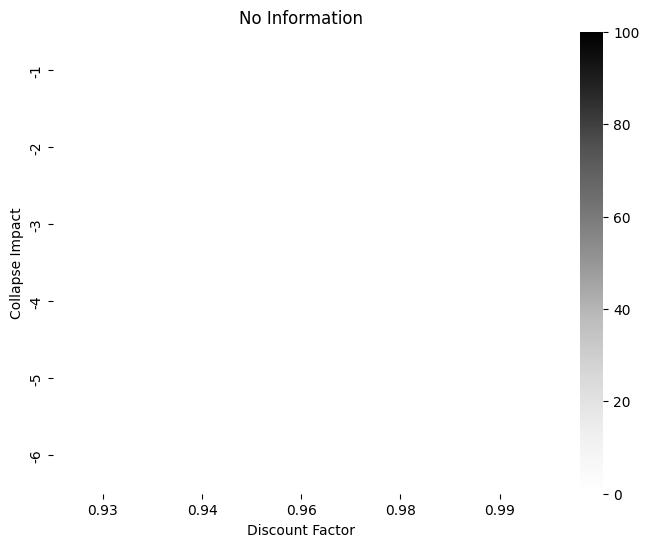

In [ ]:

# Convert list of dictionaries into a DataFrame
df = pd.DataFrame(cooperation_basin_size_no_information_discount_factors_m_vals)
df['discount_factor'] = df['discount_factor'].round(2)

# Pivot the DataFrame for heatmap format
heatmap_data = df.pivot(index='m', columns='discount_factor', values='cooperation_basin_size_no_information')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='Greys', fmt=".1f", linewidths=0.5, vmin = 0, vmax = 100)
plt.title("No Information")
plt.xlabel("Discount Factor")
plt.ylabel("Collapse Impact")
plt.gca().invert_yaxis()  # Ensure 'm' values are in descending order

# Display the heatmap
plt.show()

In [ ]:
print(cooperation_basin_size_no_information_discount_factors_m_vals[0])

NameError: name 'cooperation_basin_size_no_information_discount_factors_m_vals' is not defined

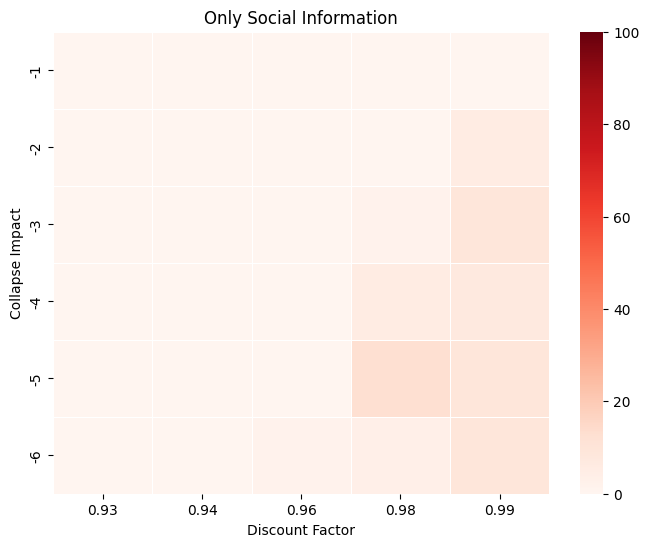

In [ ]:

# Convert list of dictionaries into a DataFrame
df = pd.DataFrame(cooperation_basin_size_no_information_discount_factors_m_vals)
df['discount_factor'] = df['discount_factor'].round(3)

# Pivot the DataFrame for heatmap format
heatmap_data = df.pivot(index='m', columns='discount_factor', values='cooperation_basin_size_only_action_history_information')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='Reds', fmt=".1f", linewidths=0.5,  vmin = 0, vmax = 100)
plt.title("Only Social Information")
plt.xlabel("Discount Factor")
plt.ylabel("Collapse Impact")
plt.gca().invert_yaxis()  # Ensure 'm' values are in descending order

# Display the heatmap
plt.show()

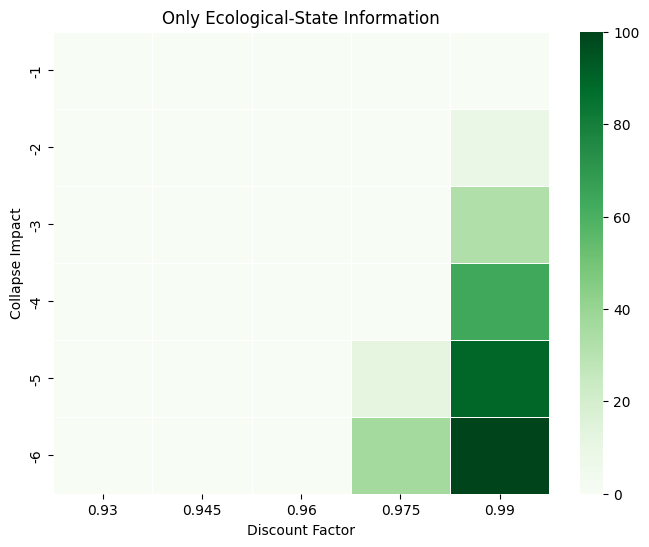

In [ ]:

# Convert list of dictionaries into a DataFrame
df = pd.DataFrame(cooperation_basin_size_no_information_discount_factors_m_vals)
df['discount_factor'] = df['discount_factor'].round(3)

# Pivot the DataFrame for heatmap format
heatmap_data = df.pivot(index='m', columns='discount_factor', values='cooperation_basin_only_state_information')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='Greens', fmt=".1f", linewidths=0.5,  vmin = 0, vmax = 100)
plt.title("Only Ecological-State Information")
plt.xlabel("Discount Factor")
plt.ylabel("Collapse Impact")
plt.gca().invert_yaxis()  # Ensure 'm' values are in descending order

# Display the heatmap
plt.show()

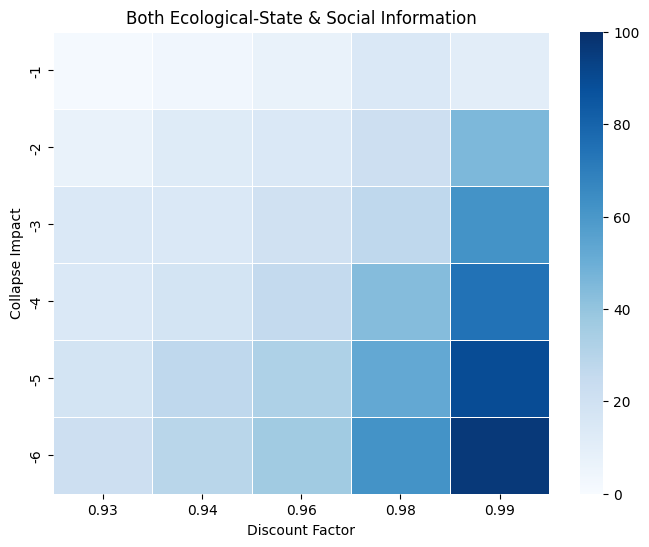

In [ ]:

# Convert list of dictionaries into a DataFrame
df = pd.DataFrame(cooperation_basin_size_no_information_discount_factors_m_vals)
df['discount_factor'] = df['discount_factor'].round(2)

# Pivot the DataFrame for heatmap format
heatmap_data = df.pivot(index='m', columns='discount_factor', values='cooperation_basin_size_both_state_and_action_information')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='Blues', fmt=".1f", linewidths=0.5,  vmin = 0, vmax = 100)
plt.title("Both Ecological-State & Social Information")
plt.xlabel("Discount Factor")
plt.ylabel("Collapse Impact")
plt.gca().invert_yaxis()  # Ensure 'm' values are in descending order

# Display the heatmap
plt.show()

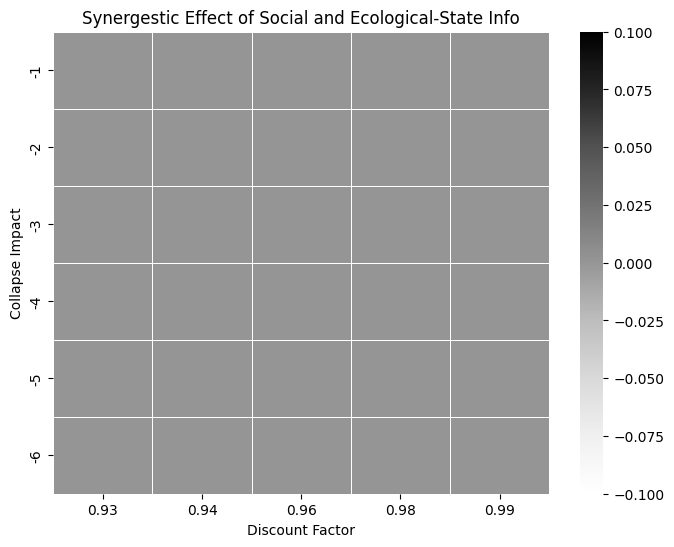

In [ ]:

# Convert list of dictionaries into a DataFrame
df = pd.DataFrame(cooperation_basin_size_no_information_discount_factors_m_vals)
df['discount_factor'] = df['discount_factor'].round(2)

# Pivot the DataFrame for heatmap format
heatmap_data = df.pivot(index='m', columns='discount_factor', values='cooperation_basin_size_no_information')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='Greys', fmt=".1f", linewidths=0.5)
plt.title("Synergestic Effect of Social and Ecological-State Info")
plt.xlabel("Discount Factor")
plt.ylabel("Collapse Impact")
plt.gca().invert_yaxis()  # Ensure 'm' values are in descending order

# Display the heatmap
plt.show()